#Mobile Phone Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Importing DataSet and Displaying


In [ ]:
df = pd.read_csv('/content/user_behavior_dataset.csv')
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [ ]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [ ]:
df.tail()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1
699,700,OnePlus 9,Android,212,5.4,1306,49,828,23,Female,3


In [ ]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


##Finding Null Values

In [ ]:
df.isnull().sum().sum()

0

##Finding Duplicate values

In [ ]:
df.duplicated().sum().sum()

0

##Comparison

<Figure size 1200x600 with 0 Axes>

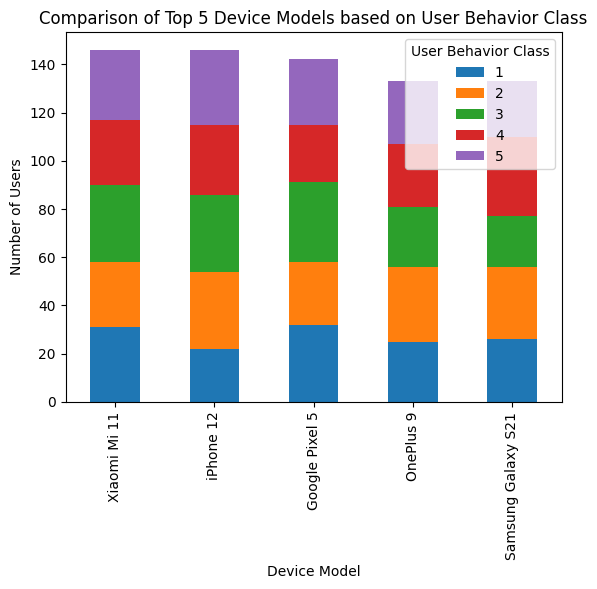

In [ ]:
device_model_counts = df.groupby(['Device Model', 'User Behavior Class'])['User ID'].count().unstack().fillna(0)
top_5_device_models = df['Device Model'].value_counts().nlargest(5).index.tolist()
device_model_counts = device_model_counts.loc[top_5_device_models]

plt.figure(figsize=(12, 6))
device_model_counts.plot(kind='bar', stacked=True)
plt.title('Comparison of Top 5 Device Models based on User Behavior Class')
plt.xlabel('Device Model')
plt.ylabel('Number of Users')
plt.legend(title='User Behavior Class')
plt.show()

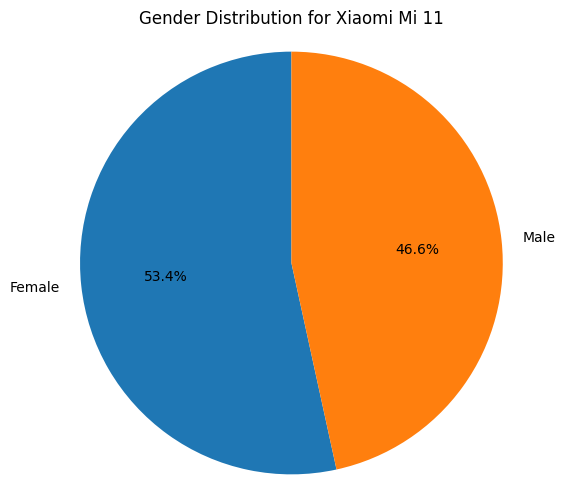

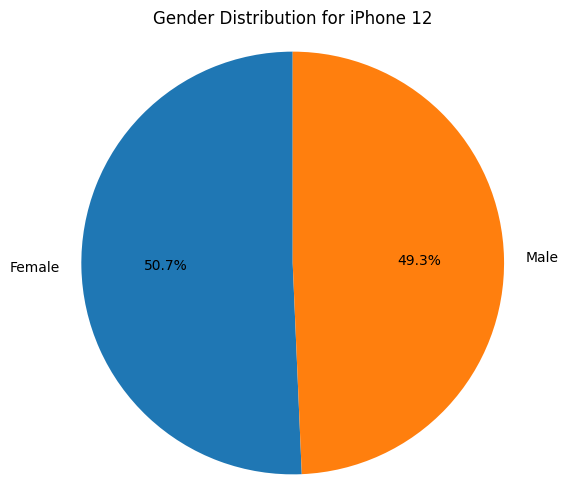

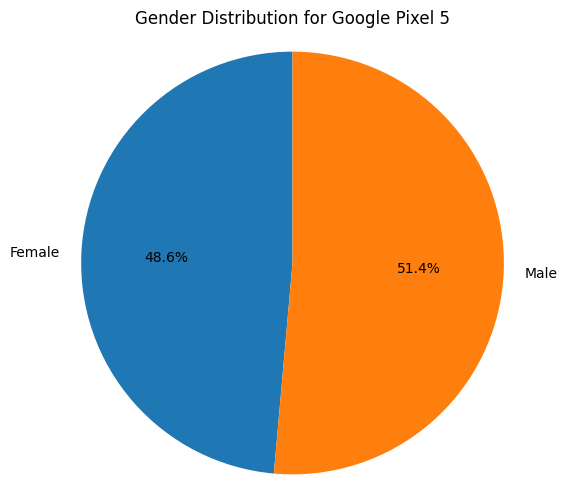

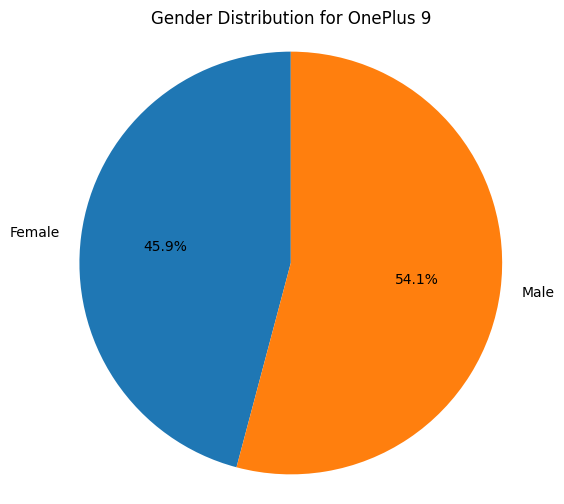

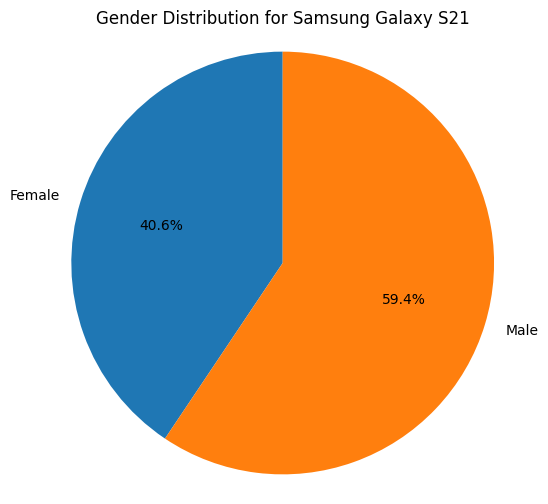

In [ ]:
device_gender_counts = df.groupby(['Device Model', 'Gender'])['User ID'].count().unstack().fillna(0)

# Select top 5 device models
top_5_device_models = df['Device Model'].value_counts().nlargest(5).index.tolist()
device_gender_counts = device_gender_counts.loc[top_5_device_models]

# Create pie charts for each device model
for device_model in top_5_device_models:
  gender_counts = device_gender_counts.loc[device_model]
  plt.figure(figsize=(6, 6))
  plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
  plt.title(f'Gender Distribution for {device_model}')
  plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.show()

In [ ]:
# Assuming the column for operating systems is named 'Operating System'
operating_system_counts = df['Operating System'].value_counts()

# Display the counts
print(operating_system_counts)

Operating System
Android    554
iOS        146
Name: count, dtype: int64
